In [2]:
import numpy as np
import pandas as pd
import ast
import nltk
import seaborn as snd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
movies = pd.read_csv('tmdb_5000_movies.csv')
cred =pd.read_csv('tmdb_5000_credits.csv')


In [26]:
movies.head(5)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [8]:
movies["vote_average"]

0       7.2
1       6.9
2       6.3
3       7.6
4       6.1
       ... 
4798    6.6
4799    5.9
4800    7.0
4801    5.7
4802    6.3
Name: vote_average, Length: 4803, dtype: float64

In [10]:
ten =[9.1,9.2,9.3,9.4,9.5,9.6,9.8,9.9,10]
nine=[8.1,8.2,8.3,8.4,8.5,8.6,8.7,8.8,8.9,9]
eight=[7.1,7.2,7.3,7.4,7.5,7.6,7.7,7.8,7.9,8]
seven=[6.1,6.2,6.3,6.4,6.5,6.6,6.7,6.8,6.9,7]
six=[5.1,5.2,5.3,5.4,5.5,5.6,5.7,5.8,5.9,6]
five=[4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5]
four=[3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,4]
three=[2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,3]
two=[1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2]
one=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

In [22]:
def label_encode(Rating):
  if (Rating in ten) :
    label = 10
  elif (Rating in nine) :
    label = 9
  elif (Rating in eight) :
    label = 8
  elif (Rating in seven) :
    label = 7
  elif (Rating in six) :
    label = 6
  elif (Rating in five) :
    label = 5
  elif (Rating in four) :
    label = 4
  elif (Rating in three) :
    label = 3
  elif (Rating in two) :
    label = 2
  else :
    label = 1
  return Rating
 
movies["vote_average"] = movies["vote_average"].apply(label_encode)

AttributeError: 'Vote_average' is not a valid function for 'Series' object

In [19]:
movies['vote_average']

0       7.2
1       6.9
2       6.3
3       7.6
4       6.1
       ... 
4798    6.6
4799    5.9
4800    7.0
4801    5.7
4802    6.3
Name: vote_average, Length: 4803, dtype: float64

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='vote_average', ylabel='count'>

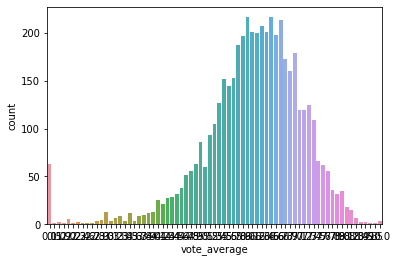

In [14]:
snd.countplot(movies['vote_average'])

In [23]:
movies = movies.merge(cred, on='title')

In [25]:
movies = movies[['movie_id','title','overview','genres','keywords','cast','crew']]

In [27]:
movies.isnull().sum()

movie_id    0
title       0
overview    3
genres      0
keywords    0
cast        0
crew        0
dtype: int64